# Decistion tree modelling

In this notebook we are going to build decision tree models on our full dataset and small size datasets. For the full size dataset we will build two models. One where we do not pay attention to class imbalance and one where we do. For the small size dataset where we have not manually balanced the data, we will create two models with the same procedure as with the full size dataset. However, with the manually balanced small dataset we will create the model without using the parameter class_weight = 'balance'. In this way, we can compare whether it works best to manually balance the dataset or use the built in parameter class_weight in LogisticRegression. 

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#Own functions
from helperPlots import plot_clf_report

## Decision tree on the full size dataset 

### Loading and splitting the data 

In [8]:
df_full_size = pd.read_csv('../data/pre-processed-data/data-full-size.csv')
df_full_size.head()

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,1,1,44,1,0,1,40454.0,217,1,...,0,0,0,0,0,0,0,0,0,1
1,1,2,1,76,1,0,0,33536.0,183,0,...,0,0,0,0,0,0,0,1,0,0
2,2,3,1,47,1,0,1,38294.0,27,1,...,0,0,0,0,0,0,0,0,0,1
3,3,4,1,21,1,1,0,28619.0,203,0,...,0,0,0,0,0,0,0,0,1,0
4,4,5,0,29,1,1,0,27496.0,39,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
df_full_size = df_full_size.iloc[:,2:]
df_full_size.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,0,1,40454.0,217,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,76,1,0,0,33536.0,183,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,47,1,0,1,38294.0,27,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,21,1,1,0,28619.0,203,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,29,1,1,0,27496.0,39,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
df_full_size['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [51]:
X = df_full_size.drop('Response', axis = 1)
y = df_full_size['Response']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(285831, 218)
(285831,)
(95278, 218)
(95278,)


### Creating and tuning the model

In [54]:
tree = DecisionTreeClassifier(random_state = 12)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12)

In [55]:
print('With our initial decision tree model we are able to get a test score of {:.2%}'.format(tree.score(X_test, y_test)))
print('Our train score is {:.2%}'.format(tree.score(X_train, y_train)))

With our initial decision tree model we are able to get a test score of 82.82%
Our train score is 99.99%


Now we will try to tune our model by creating some different ones. We will try to create one with class_weight = 'balanced' and one without.

In [56]:
def tree_trials(X_train, X_test, y_train, y_test, random_state_list, max_features_list, max_depth_list, class_weight = None):
    scores_dict = {'Train Score': [], 'Test Score': [], 'Random_state': [], 'max_features': [], 'max_depth': []}

    for i in range(len(random_state_list)):
        model = DecisionTreeClassifier(random_state=random_state_list[i], max_features=max_features_list[i]\
            , max_depth=max_depth_list[i], class_weight=class_weight)
        model.fit(X_train, y_train)
        scores_dict['Train Score'].append(model.score(X_train, y_train))
        scores_dict['Test Score'].append(model.score(X_test, y_test))
        scores_dict['Random_state'].append(random_state_list[i])
        scores_dict['max_features'].append(max_features_list[i])
        scores_dict['max_depth'].append(max_depth_list[i])
    
    return scores_dict

In [57]:
random_state_list = [2, 5, 25, 100, 455, 700]
max_features_list = [15, 45, 100, 150, 200, 218]
max_depth_list = [2, 7, 25, 70, 100, 250]

In [58]:
results_tree = tree_trials(X_train, X_test, y_train, y_test, random_state_list, max_features_list, max_depth_list)

In [59]:
results_tree

{'Train Score': [0.8771336908872726,
  0.8771896680206136,
  0.9145893902340894,
  0.9979323446372157,
  0.999905538587487,
  0.999905538587487],
 'Test Score': [0.8783454732467096,
  0.8782300216209408,
  0.8616364743172611,
  0.8281974852536788,
  0.8262662944226369,
  0.8269485085749071],
 'Random_state': [2, 5, 25, 100, 455, 700],
 'max_features': [15, 45, 100, 150, 200, 218],
 'max_depth': [2, 7, 25, 70, 100, 250]}

In [60]:
results_tree_balanced = tree_trials(X_train, X_test, y_train, y_test, random_state_list, max_features_list, max_depth_list, class_weight='balanced')

In [61]:
results_tree_balanced

{'Train Score': [0.6125227844425553,
  0.6658235110957174,
  0.7860763877955855,
  0.9801945905097768,
  0.9991778358540536,
  0.999905538587487],
 'Test Score': [0.6125653351245828,
  0.6653687105102962,
  0.7413148890614832,
  0.8177858477298012,
  0.8249963265391801,
  0.8230126576964252],
 'Random_state': [2, 5, 25, 100, 455, 700],
 'max_features': [15, 45, 100, 150, 200, 218],
 'max_depth': [2, 7, 25, 70, 100, 250]}

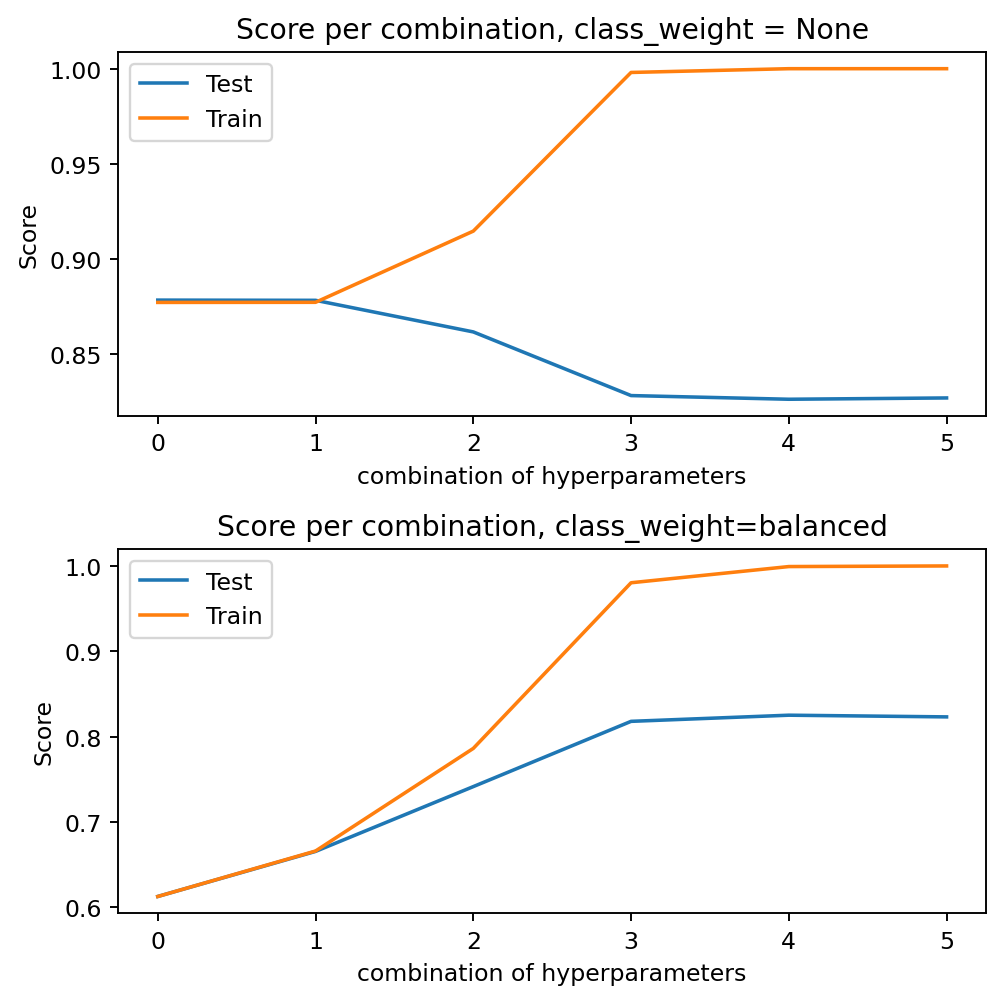

In [62]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (6,6), dpi = 170)
ax[0].plot(range(len(random_state_list)), results_tree['Test Score'], label = 'Test')
ax[0].plot(range(len(random_state_list)), results_tree['Train Score'], label = 'Train')
#ax[0].set_xticks(range(len(random_state_list)))
#ax[0].set_xticklabels(random_state_list)
ax[0].legend()
ax[0].set(xlabel = 'combination of hyperparameters', ylabel = 'Score', title = 'Score per combination, class_weight = None')

ax[1].plot(range(len(random_state_list)), results_tree_balanced['Test Score'], label = 'Test')
ax[1].plot(range(len(random_state_list)), results_tree_balanced['Train Score'], label = 'Train')
#ax[1].set_xticks(range(len(random_state_list)))
#ax[1].set_xticklabels(random_state_list)
ax[1].legend()
ax[1].set(xlabel = 'combination of hyperparameters', ylabel = 'Score', title = 'Score per combination, class_weight=balanced')

plt.tight_layout()
plt.show()

In [63]:
def find_best_combo(max_depth_list, max_features_list, random_state_list, test_scores):
    max_test_score = max(test_scores)
    max_test_score_idx = np.argmax(test_scores)
    best_max_depth = max_depth_list[max_test_score_idx]
    best_max_features = max_features_list[max_test_score_idx]
    best_random_state = random_state_list[max_test_score_idx]
    optimal_parameters = {'random_state': best_random_state, 'max_features': best_max_features, 'max_depth': best_max_depth}
    print('The highest test score is {:.2%}'.format(max_test_score))

    return optimal_parameters

In [64]:
best_combo_tree_full_size = find_best_combo(max_depth_list, max_features_list, random_state_list, results_tree['Test Score'])
best_combo_tree_full_size

The highest test score is 87.83%


{'random_state': 2, 'max_features': 15, 'max_depth': 2}

In [65]:
best_combo_tree_full_size_balanced = find_best_combo(max_depth_list, max_features_list, random_state_list, results_tree_balanced['Test Score'])
best_combo_tree_full_size_balanced

The highest test score is 82.50%


{'random_state': 455, 'max_features': 200, 'max_depth': 100}

### Evaluating the models

#### Model with class_weight = 'None'

In [66]:
tree_model = DecisionTreeClassifier(
    random_state=best_combo_tree_full_size['random_state'],
    max_features=best_combo_tree_full_size['max_features'], 
    max_depth=best_combo_tree_full_size['max_depth'])

tree_model.fit(X_train, y_train)

print('With our optimal tree model with class_weight=None the highest test score is {:.2%}'.format(tree_model.score(X_test, y_test)))

With our optimal tree model with class_weight=None the highest test score is 87.83%


In [67]:
sorted(list(zip(X.columns, tree_model.feature_importances_)), key=lambda x: x[1], reverse = True)[:10]

[('Vehicle_Damage', 0.8961980791587086),
 ('Vehicle_Age_< 1 Year', 0.10379405666533942),
 ('Region_Code_14', 7.864175951975993e-06),
 ('Gender', 0.0),
 ('Age', 0.0),
 ('Driving_License', 0.0),
 ('Previously_Insured', 0.0),
 ('Annual_Premium', 0.0),
 ('Vintage', 0.0),
 ('Region_Code_0', 0.0)]

In [68]:
sorted(list(zip(X.columns, tree_model.feature_importances_)), key=lambda x: x[1], reverse = True)[-10:]

[('Policy_Sales_Channel_154', 0.0),
 ('Policy_Sales_Channel_155', 0.0),
 ('Policy_Sales_Channel_156', 0.0),
 ('Policy_Sales_Channel_157', 0.0),
 ('Policy_Sales_Channel_158', 0.0),
 ('Policy_Sales_Channel_159', 0.0),
 ('Policy_Sales_Channel_160', 0.0),
 ('Policy_Sales_Channel_163', 0.0),
 ('Vehicle_Age_1-2 Year', 0.0),
 ('Vehicle_Age_> 2 Years', 0.0)]

In [69]:
confusion_matrix(y_test, tree_model.predict(X_test))

array([[83687,     0],
       [11591,     0]])

In [70]:
print(classification_report(y_test, tree_model.predict(X_test), target_names=['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.88      1.00      0.94     83687
    Interested       0.00      0.00      0.00     11591

      accuracy                           0.88     95278
     macro avg       0.44      0.50      0.47     95278
  weighted avg       0.77      0.88      0.82     95278



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


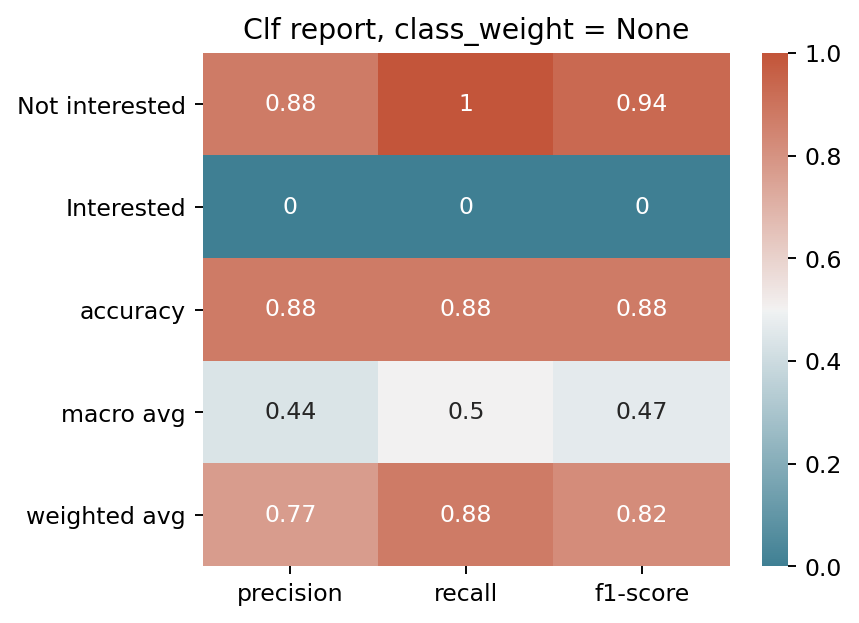

In [71]:
tree_clf_report = classification_report(y_test, tree_model.predict(X_test), target_names=['Not interested', 'Interested'], output_dict=True)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plot_clf_report(tree_clf_report, title = 'Clf report, class_weight = None', cmap=cmap)

#### Model with class_weight = 'balanced'

In [72]:
tree_model_balanced = DecisionTreeClassifier(random_state=455, max_features=200, max_depth=100)
tree_model_balanced.fit(X_train, y_train)

print('With our optimal tree model with the balanced parameter the highest test score is {:.14%}'.format(tree_model_balanced.score(X_test, y_test)))

With our optimal tree model with the balanced parameter the highest test score is 82.62662944226369%


In [73]:
sorted(list(zip(X.columns, tree_model_balanced.feature_importances_)), key=lambda x: x[1], reverse = True)[:10]

[('Annual_Premium', 0.24787324607278574),
 ('Vintage', 0.2459464898578294),
 ('Age', 0.1304725092069405),
 ('Vehicle_Damage', 0.1260710801534834),
 ('Gender', 0.02464984987190774),
 ('Previously_Insured', 0.012139183280317808),
 ('Policy_Sales_Channel_124', 0.009264191859805676),
 ('Region_Code_28', 0.009105456999716145),
 ('Region_Code_8', 0.008912122700645163),
 ('Vehicle_Age_1-2 Year', 0.007148197118861322)]

In [74]:
sorted(list(zip(X.columns, tree_model_balanced.feature_importances_)), key=lambda x: x[1], reverse = True)[-10:]

[('Policy_Sales_Channel_115', 0.0),
 ('Policy_Sales_Channel_117', 0.0),
 ('Policy_Sales_Channel_118', 0.0),
 ('Policy_Sales_Channel_126', 0.0),
 ('Policy_Sales_Channel_134', 0.0),
 ('Policy_Sales_Channel_137', 0.0),
 ('Policy_Sales_Channel_143', 0.0),
 ('Policy_Sales_Channel_144', 0.0),
 ('Policy_Sales_Channel_146', 0.0),
 ('Policy_Sales_Channel_149', 0.0)]

In [75]:
confusion_matrix(y_test, tree_model_balanced.predict(X_test))

array([[75238,  8449],
       [ 8104,  3487]])

In [77]:
print(classification_report(y_test, tree_model_balanced.predict(X_test), target_names=['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.90      0.90      0.90     83687
    Interested       0.29      0.30      0.30     11591

      accuracy                           0.83     95278
     macro avg       0.60      0.60      0.60     95278
  weighted avg       0.83      0.83      0.83     95278



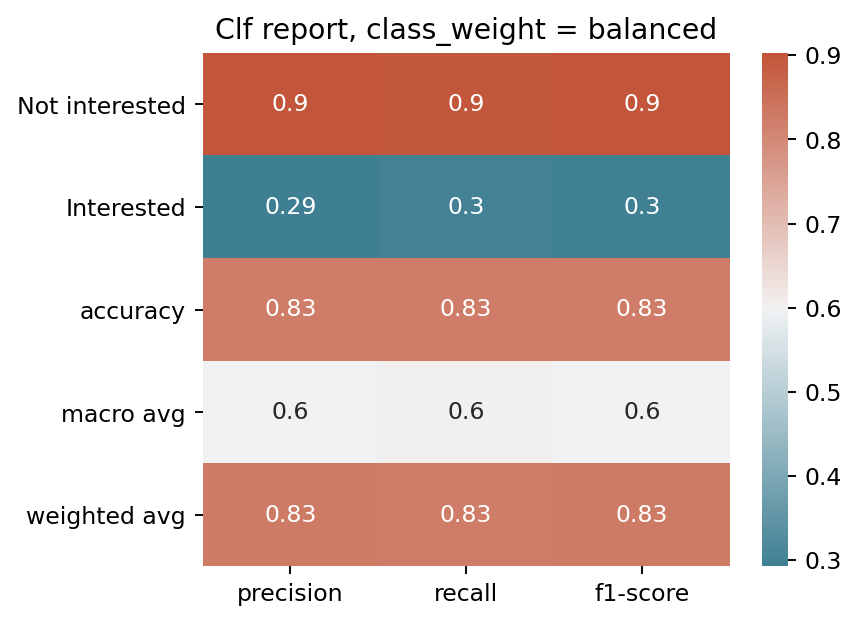

In [78]:
tree_model_balanced_clf_report = classification_report(y_test, tree_model_balanced.predict(X_test), target_names=['Not interested', 'Interested'], output_dict=True)
plot_clf_report(tree_model_balanced_clf_report, title = 'Clf report, class_weight = balanced', cmap = cmap)

In [ ]:
features_important_balanced = sorted(list(zip(X.columns, tree_model_balanced.feature_importances_)), key=lambda x: x[1], reverse = True)

In [131]:
def plot_most_important_features(features_list, top_n_features):
    features_important_name_list = []
    features_important_list = []
    for i in features_list[:top_n_features]:
        for j in i:
            if type(j) == str:
                features_important_name_list.append(j)
            elif isinstance(j, float):
                features_important_list.append(j)

    fig, ax = plt.subplots(figsize = (6,4), dpi = 170)
    ax.barh(features_important_name_list, features_important_list)
    ax.set(xlabel = 'Feature importance', title = 'Top {} most important features'.format(top_n_features))
    plt.show()


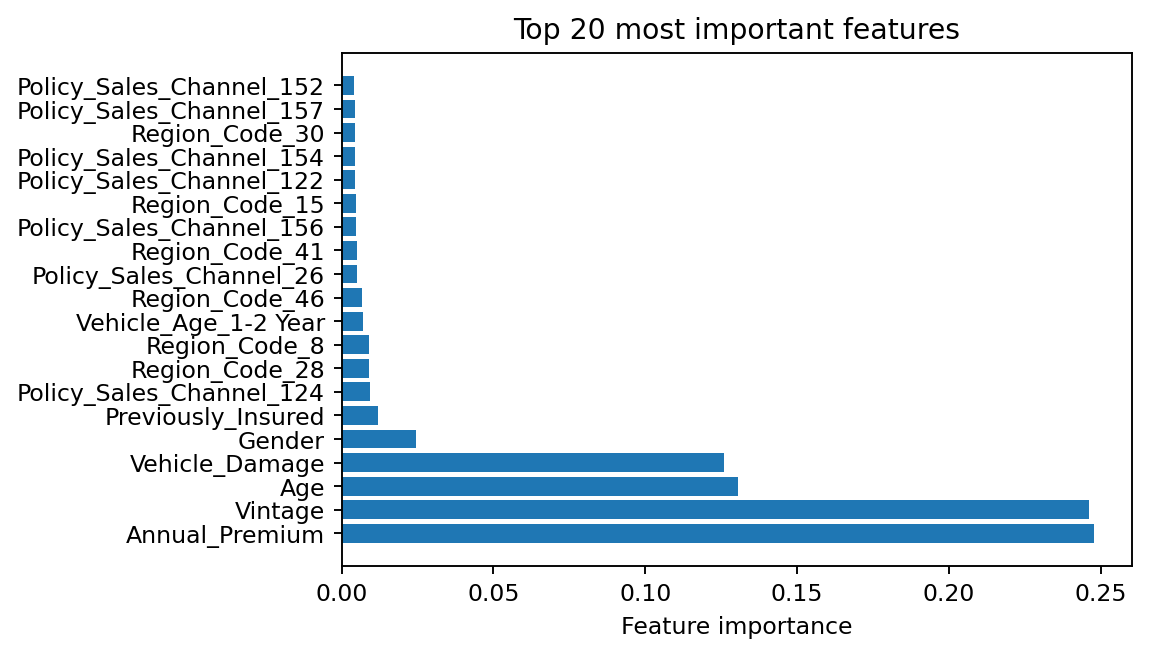

In [ ]:
plot_most_important_features(features_important_balanced, 20)

## Decision tree on the small size dataset

### Loading and splitting the data

In [79]:
df_small = pd.read_csv('../data/pre-processed-data/data-small-size.csv')
df_small.head()

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,35377,35378,1,58,1,0,1,22811.0,29,0,...,0,0,0,0,0,0,0,1,0,0
1,19830,19831,1,21,1,0,1,33282.0,159,0,...,0,0,0,0,0,1,0,0,1,0
2,128911,128912,1,23,1,0,1,39853.0,213,0,...,0,0,0,0,0,0,0,0,1,0
3,120005,120006,1,20,1,0,0,29252.0,146,0,...,0,0,0,0,0,1,0,0,1,0
4,180819,180820,0,63,1,0,1,45202.0,196,0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
df_small = df_small.iloc[:, 2:]
df_small

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,58,1,0,1,22811.0,29,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,21,1,0,1,33282.0,159,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,23,1,0,1,39853.0,213,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,20,1,0,0,29252.0,146,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,63,1,0,1,45202.0,196,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57161,1,49,1,0,1,51404.0,212,0,0,0,...,0,0,0,0,0,0,0,1,0,0
57162,1,53,1,0,1,42057.0,207,0,0,0,...,0,0,0,0,0,0,0,1,0,0
57163,0,61,1,0,0,37290.0,112,1,0,0,...,0,0,0,0,0,0,0,1,0,0
57164,0,30,1,1,0,24366.0,196,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [81]:
df_small['Response'].value_counts()

0    50146
1     7020
Name: Response, dtype: int64

In [82]:
X = df_small.drop('Response', axis = 1)
y = df_small['Response']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

In [84]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42874, 218)
(42874,)
(14292, 218)
(14292,)


#### Creating and tuning the model

In [85]:
tree_small = DecisionTreeClassifier(random_state = 12)
tree_small.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12)

In [86]:
print('With our inital decision tree model on our small size dataset we are able to get a score of {:.5%}'.format(tree_small.score(X_test, y_test)))

With our inital decision tree model on our small size dataset we are able to get a score of 82.22782%


In [87]:
results_tree_small = tree_trials(X_train, X_test, y_train, y_test, random_state_list, max_features_list, max_depth_list)

In [88]:
results_tree_small

{'Train Score': [0.8762653356346504,
  0.8770350328870644,
  0.927158650930634,
  1.0,
  1.0,
  1.0],
 'Test Score': [0.8800027987685418,
  0.8800027987685418,
  0.853904282115869,
  0.8233977050097957,
  0.8227679820878814,
  0.8219983207388749],
 'Random_state': [2, 5, 25, 100, 455, 700],
 'max_features': [15, 45, 100, 150, 200, 218],
 'max_depth': [2, 7, 25, 70, 100, 250]}

In [89]:
results_tree_small_balanced = tree_trials(X_train, X_test, y_train, y_test, random_state_list, max_features_list, max_depth_list, class_weight='balanced')

In [90]:
results_tree_small_balanced

{'Train Score': [0.6846340439427159,
  0.6776134720343332,
  0.7922750384848626,
  0.9969445351495079,
  1.0,
  1.0],
 'Test Score': [0.6872376154492024,
  0.6723341729638959,
  0.7419535404422054,
  0.8218583823117828,
  0.8212986286034145,
  0.8212986286034145],
 'Random_state': [2, 5, 25, 100, 455, 700],
 'max_features': [15, 45, 100, 150, 200, 218],
 'max_depth': [2, 7, 25, 70, 100, 250]}

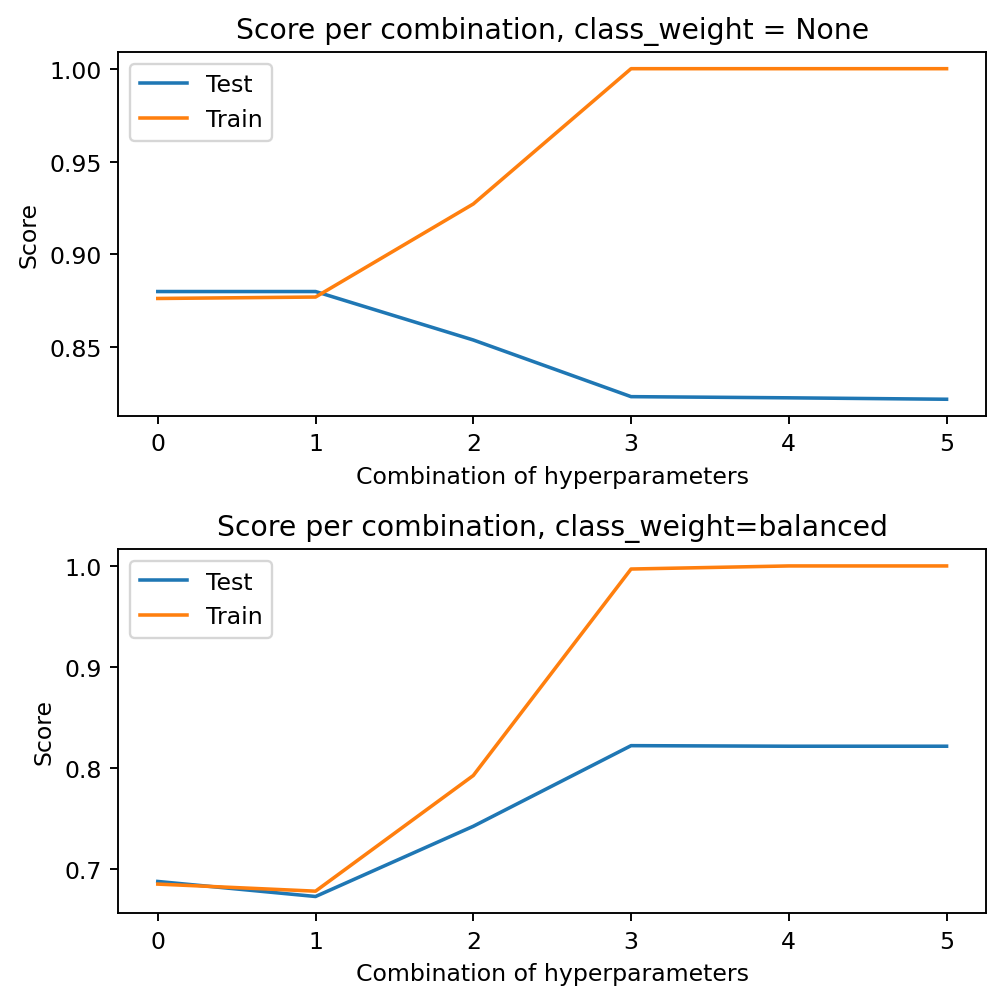

In [91]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (6,6), dpi = 170)
ax[0].plot(range(len(random_state_list)), results_tree_small['Test Score'], label = 'Test')
ax[0].plot(range(len(random_state_list)), results_tree_small['Train Score'], label = 'Train')
ax[0].legend()
ax[0].set(xlabel = 'Combination of hyperparameters', ylabel = 'Score', title = 'Score per combination, class_weight = None')

ax[1].plot(range(len(random_state_list)), results_tree_small_balanced['Test Score'], label = 'Test')
ax[1].plot(range(len(random_state_list)), results_tree_small_balanced['Train Score'], label = 'Train')
#ax[1].set_xticks(range(len(random_state_list)))
#ax[1].set_xticklabels(random_state_list)
ax[1].legend()
ax[1].set(xlabel = 'Combination of hyperparameters', ylabel = 'Score', title = 'Score per combination, class_weight=balanced')

plt.tight_layout()
plt.show()

In [92]:
combo_tree_small = find_best_combo(max_depth_list, max_features_list, random_state_list, results_tree_small['Test Score'])
combo_tree_small

The highest test score is 88.00%


{'random_state': 2, 'max_features': 15, 'max_depth': 2}

In [93]:
combo_tree_small_balanced = find_best_combo(max_depth_list, max_features_list, random_state_list, results_tree_small_balanced['Test Score'])
combo_tree_small_balanced

The highest test score is 82.19%


{'random_state': 100, 'max_features': 150, 'max_depth': 70}

### Evaluating the models 

#### Model with class_weight = None

In [ ]:
tree_small = DecisionTreeClassifier(max_depth=combo_tree_small['max_depth'], max_features=combo_tree_small['max_features'], \
    random_state=combo_tree_small['random_state'])

tree_small.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=15, random_state=2)

In [ ]:
print('With our best decision tree classifier wihtout balanced data we are able to get a score of {:.2%}'.format(tree_small.score(X_test, y_test)))

With our best decision tree classifier wihtout balanced data we are able to get a score of 88.00%


In [ ]:
sorted(list(zip(X.columns, tree_small.feature_importances_)), key=lambda x: x[1], reverse = True)[:10]

[('Annual_Premium', 0.44551519641648507),
 ('Policy_Sales_Channel_124', 0.3024149351279467),
 ('Policy_Sales_Channel_155', 0.2520698684555682),
 ('Gender', 0.0),
 ('Age', 0.0),
 ('Driving_License', 0.0),
 ('Previously_Insured', 0.0),
 ('Vehicle_Damage', 0.0),
 ('Vintage', 0.0),
 ('Region_Code_0', 0.0)]

In [ ]:
sorted(list(zip(X.columns, tree_small.feature_importances_)), key=lambda x: x[1], reverse = True)[-10:]

[('Policy_Sales_Channel_154', 0.0),
 ('Policy_Sales_Channel_156', 0.0),
 ('Policy_Sales_Channel_157', 0.0),
 ('Policy_Sales_Channel_158', 0.0),
 ('Policy_Sales_Channel_159', 0.0),
 ('Policy_Sales_Channel_160', 0.0),
 ('Policy_Sales_Channel_163', 0.0),
 ('Vehicle_Age_1-2 Year', 0.0),
 ('Vehicle_Age_< 1 Year', 0.0),
 ('Vehicle_Age_> 2 Years', 0.0)]

In [ ]:
confusion_matrix(y_test, tree_small.predict(X_test))

array([[12577,     0],
       [ 1715,     0]])

In [ ]:
print(classification_report(y_test, tree_small.predict(X_test), target_names=['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.88      1.00      0.94     12577
    Interested       0.00      0.00      0.00      1715

      accuracy                           0.88     14292
     macro avg       0.44      0.50      0.47     14292
  weighted avg       0.77      0.88      0.82     14292



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


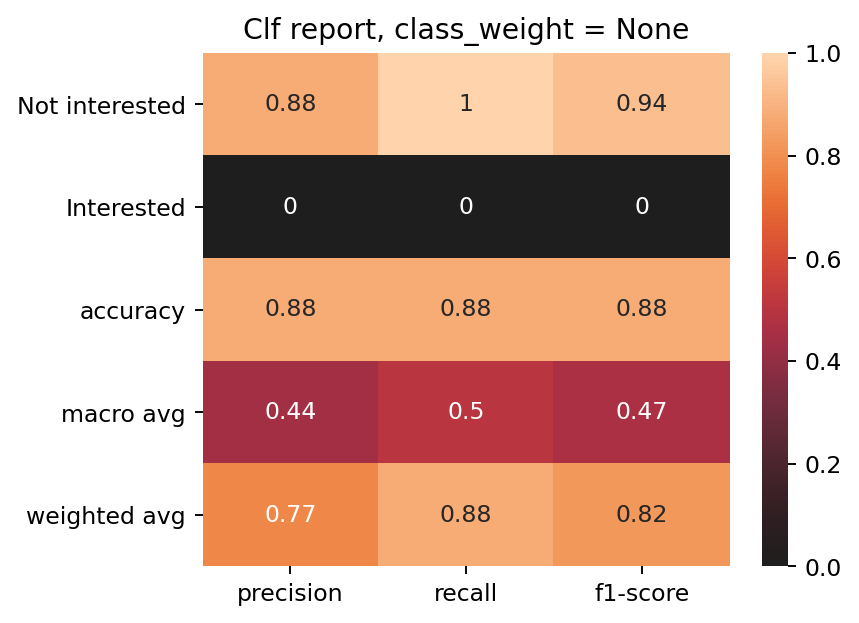

In [ ]:
tree_small_clf_report = classification_report(y_test, tree_small.predict(X_test), target_names=['Not interested', 'Interested'], output_dict=True)
plot_clf_report(tree_small_clf_report, title = 'Clf report, class_weight = None')

#### Model with class_weight = 'balanced'

In [ ]:
tree_small_balanced = DecisionTreeClassifier(max_depth=combo_tree_small_balanced['max_depth'], max_features=combo_tree_small_balanced['max_features'], \
    random_state=combo_tree_small_balanced['random_state'])

tree_small_balanced.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=70, max_features=150, random_state=100)

In [ ]:
print('With our best decision tree classifier wiht balanced data we are able to get a score of {:.2%}'.format(tree_small_balanced.score(X_test, y_test)))

With our best decision tree classifier wiht balanced data we are able to get a score of 82.34%


In [ ]:
sorted(list(zip(X.columns, tree_small_balanced.feature_importances_)), key=lambda x: x[1], reverse = True)[:10]

[('Vintage', 0.22999609193982998),
 ('Annual_Premium', 0.21443232312710725),
 ('Age', 0.13520447060811114),
 ('Previously_Insured', 0.11642776976697493),
 ('Gender', 0.023832987736725243),
 ('Vehicle_Damage', 0.0234097154961345),
 ('Region_Code_28', 0.015836938046929597),
 ('Policy_Sales_Channel_124', 0.011636965333963618),
 ('Policy_Sales_Channel_160', 0.010885857209252035),
 ('Policy_Sales_Channel_152', 0.01062371433520158)]

In [ ]:
sorted(list(zip(X.columns, tree_small.feature_importances_)), key=lambda x: x[1], reverse = True)[-10:]

[('Policy_Sales_Channel_134', 0.0),
 ('Policy_Sales_Channel_135', 0.0),
 ('Policy_Sales_Channel_137', 0.0),
 ('Policy_Sales_Channel_140', 0.0),
 ('Policy_Sales_Channel_143', 0.0),
 ('Policy_Sales_Channel_144', 0.0),
 ('Policy_Sales_Channel_146', 0.0),
 ('Policy_Sales_Channel_148', 0.0),
 ('Policy_Sales_Channel_149', 0.0),
 ('Policy_Sales_Channel_159', 0.0)]

In [ ]:
print(confusion_matrix(y_test, tree_small_balanced.predict(X_test)))

[[11250  1327]
 [ 1197   518]]


In [ ]:
print(classification_report(y_test, tree_small_balanced.predict(X_test), target_names=['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.90      0.89      0.90     12577
    Interested       0.28      0.30      0.29      1715

      accuracy                           0.82     14292
     macro avg       0.59      0.60      0.60     14292
  weighted avg       0.83      0.82      0.83     14292



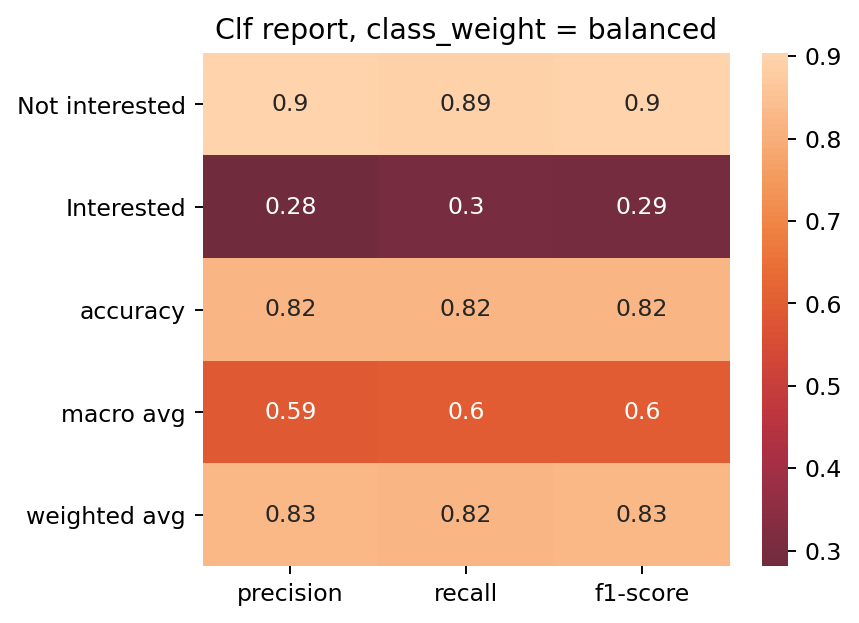

In [ ]:
tree_small_balanced_clf_report = classification_report(y_test, tree_small_balanced.predict(X_test), target_names=['Not interested', 'Interested'], output_dict=True)
plot_clf_report(tree_small_balanced_clf_report, title='Clf report, class_weight = balanced')

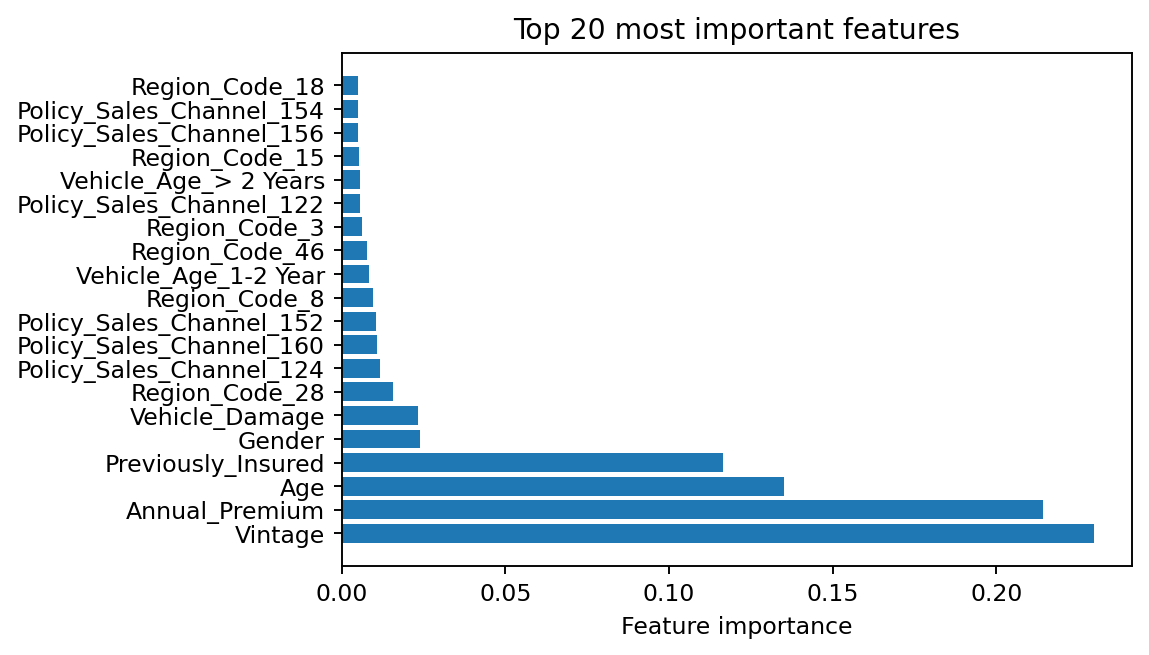

In [ ]:
plot_most_important_features(sorted(list(zip(X.columns, tree_small_balanced.feature_importances_)), key=lambda x: x[1], reverse = True),\
    20)

## Decision tree model on our manually balanced small size dataset

### Loading and splitting the data

In [10]:
df_small_manually_balanced = pd.read_csv('../data/pre-processed-data/data-small-size-balanced.csv')
df_small_manually_balanced.head()

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,194037,194038,1,43,1,0,1,2630.0,46,1,...,0,0,0,0,0,0,0,1,0,0
1,166096,166097,1,28,1,0,1,2630.0,281,1,...,0,0,1,0,0,0,0,1,0,0
2,228045,228046,0,34,1,0,1,50812.0,145,1,...,0,0,0,0,0,0,0,1,0,0
3,281334,281335,1,43,1,0,1,39089.0,21,1,...,0,0,0,0,0,0,0,1,0,0
4,102730,102731,1,44,1,0,1,34162.0,115,1,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df_small_manually_balanced = df_small_manually_balanced.iloc[:, 2:]
df_small_manually_balanced

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,43,1,0,1,2630.0,46,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,28,1,0,1,2630.0,281,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,34,1,0,1,50812.0,145,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,43,1,0,1,39089.0,21,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,44,1,0,1,34162.0,115,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57161,0,45,1,1,0,30700.0,223,0,0,0,...,0,0,0,0,0,0,0,1,0,0
57162,0,24,1,1,0,38563.0,108,0,0,0,...,0,0,0,0,0,0,0,0,1,0
57163,1,20,1,1,0,2630.0,99,0,0,0,...,0,0,0,0,0,1,0,0,1,0
57164,0,22,1,1,0,31883.0,264,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
df_small_manually_balanced['Response'].value_counts()

1    28583
0    28583
Name: Response, dtype: int64

In [13]:
X = df_small_manually_balanced.drop('Response', axis = 1)
y = df_small_manually_balanced['Response']

In [14]:
X_train, _, y_train, _ = train_test_split(X, y, random_state = 12)

In [15]:
test_size = len(df_small_manually_balanced.sample(frac=0.33))
test_df = df_full_size.sample(n=test_size)
test_df['Response'].value_counts()

0    16562
1     2303
Name: Response, dtype: int64

In [16]:
X_test = test_df.drop('Response', axis = 1)
y_test = test_df['Response']

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42874, 218)
(42874,)
(18865, 218)
(18865,)


### Creating and tuning the model

In [18]:
tree_small_manually_balanced = DecisionTreeClassifier(random_state=12)
tree_small_manually_balanced.fit(X_train, y_train)

print('With our initial decision tree model on our manually balanced dataset we are able to get a score of {:.2%}'.format(tree_small_manually_balanced.score(X_test, y_test)))

With our initial decision tree model on our manually balanced dataset we are able to get a score of 75.20%


In [19]:
results_tree_manually_balanced = tree_trials(X_train, X_test, y_train, y_test, random_state_list, max_features_list, max_depth_list)

NameError: name 'tree_trials' is not defined

In [142]:
results_tree_manually_balanced

{'Train Score': [0.7698371973690349,
  0.7931380323739329,
  0.8814899472874003,
  0.9972943975369688,
  0.9999067033633438,
  0.9999067033633438],
 'Test Score': [0.6120328650940896,
  0.6992843890803074,
  0.714762788232176,
  0.7486880466472303,
  0.7521865889212828,
  0.7556321229790618],
 'Random_state': [2, 5, 25, 100, 455, 700],
 'max_features': [15, 45, 100, 150, 200, 218],
 'max_depth': [2, 7, 25, 70, 100, 250]}

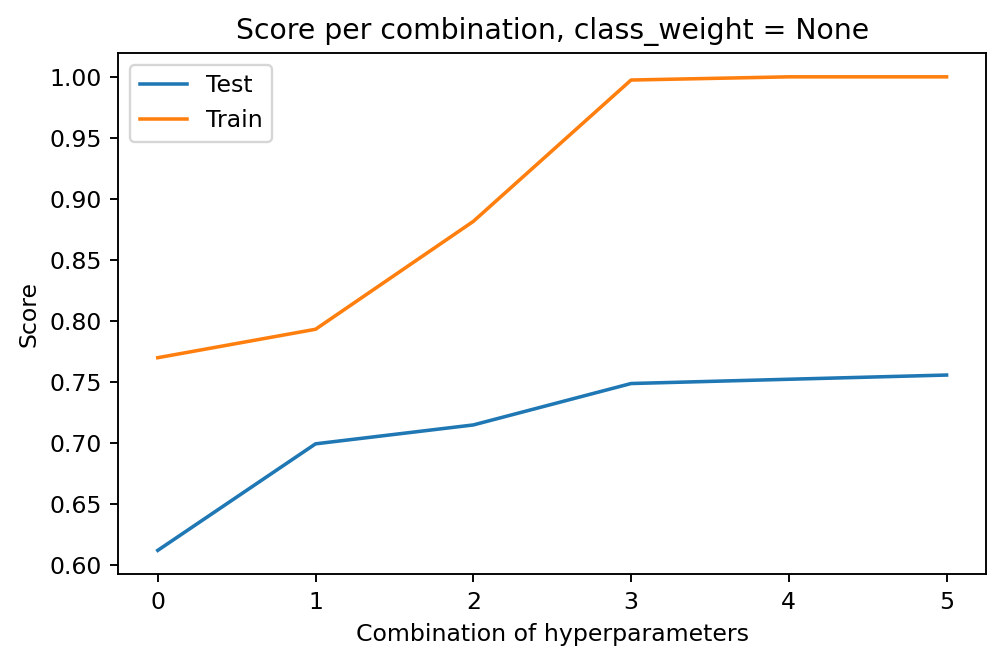

In [143]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 170)
ax.plot(range(len(random_state_list)), results_tree_manually_balanced['Test Score'], label = 'Test')
ax.plot(range(len(random_state_list)), results_tree_manually_balanced['Train Score'], label = 'Train')
ax.legend()
ax.set(xlabel = 'Combination of hyperparameters', ylabel = 'Score', title = 'Score per combination, class_weight = None')

plt.tight_layout()
plt.show()

In [144]:
combo_small_manually_balanced = find_best_combo(max_depth_list, max_features_list, random_state_list, results_tree_manually_balanced['Test Score'])
combo_small_manually_balanced

The highest test score is 75.56%


{'random_state': 700, 'max_features': 218, 'max_depth': 250}

### Evaluating the model

#### Manually balanced model on small size dataset

In [145]:
tree_small_manually_balanced = DecisionTreeClassifier(max_depth=combo_small_manually_balanced['max_depth'], max_features=combo_small_manually_balanced['max_features'], \
    random_state=combo_small_manually_balanced['random_state'])

tree_small_manually_balanced.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=250, max_features=218, random_state=700)

In [146]:
print('With our final decision tree model on our manually balanced dataset we are able to get a score of {:.2%}'.format(tree_small_manually_balanced.score(X_test, y_test)))

With our final decision tree model on our manually balanced dataset we are able to get a score of 75.56%


In [147]:
sorted(list(zip(X.columns, tree_small_manually_balanced.feature_importances_)), key=lambda x: x[1], reverse = True)[:10]

[('Vehicle_Damage', 0.3522784831530472),
 ('Vintage', 0.15932555193381362),
 ('Annual_Premium', 0.1458308581613957),
 ('Age', 0.09659344661614115),
 ('Previously_Insured', 0.03396218810683991),
 ('Gender', 0.018920893743691772),
 ('Region_Code_28', 0.010658131973896498),
 ('Policy_Sales_Channel_124', 0.00890007430534221),
 ('Region_Code_8', 0.008518324589033194),
 ('Region_Code_46', 0.006218690767236573)]

In [148]:
sorted(list(zip(X.columns, tree_small_manually_balanced.feature_importances_)), key=lambda x: x[1], reverse = True)[-10:]

[('Policy_Sales_Channel_130', 0.0),
 ('Policy_Sales_Channel_131', 0.0),
 ('Policy_Sales_Channel_134', 0.0),
 ('Policy_Sales_Channel_137', 0.0),
 ('Policy_Sales_Channel_140', 0.0),
 ('Policy_Sales_Channel_143', 0.0),
 ('Policy_Sales_Channel_144', 0.0),
 ('Policy_Sales_Channel_146', 0.0),
 ('Policy_Sales_Channel_149', 0.0),
 ('Policy_Sales_Channel_159', 0.0)]

In [149]:
print(confusion_matrix(y_test, tree_small_manually_balanced.predict(X_test)))

[[12221  4291]
 [  319  2034]]


In [150]:
print(classification_report(y_test, tree_small_manually_balanced.predict(X_test), target_names=['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.97      0.74      0.84     16512
    Interested       0.32      0.86      0.47      2353

      accuracy                           0.76     18865
     macro avg       0.65      0.80      0.66     18865
  weighted avg       0.89      0.76      0.79     18865



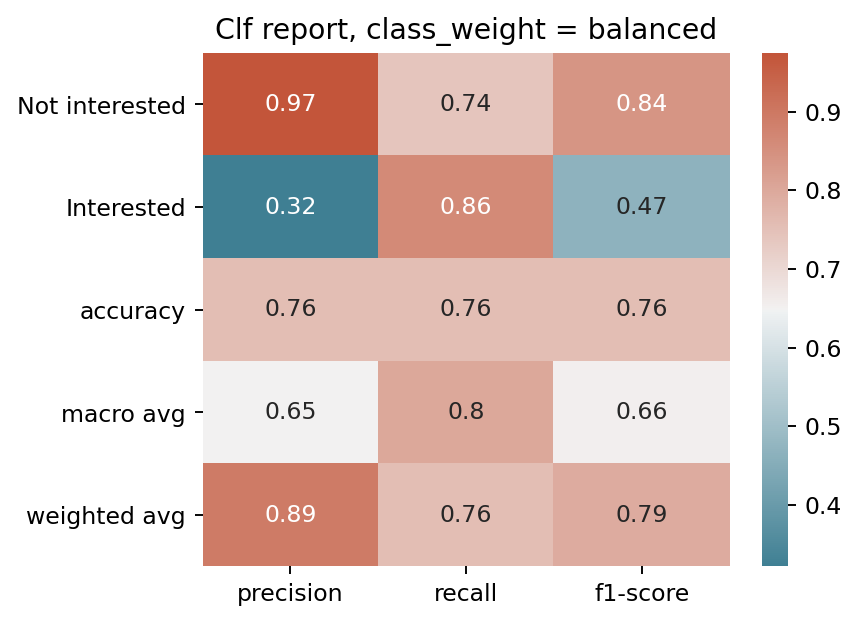

In [151]:
tree_small_manually_balanced_clf_report = classification_report(y_test, tree_small_manually_balanced.predict(X_test), target_names=['Not interested', 'Interested'], output_dict=True)
plot_clf_report(tree_small_manually_balanced_clf_report, title='Clf report, class_weight = balanced' ,cmap = cmap)

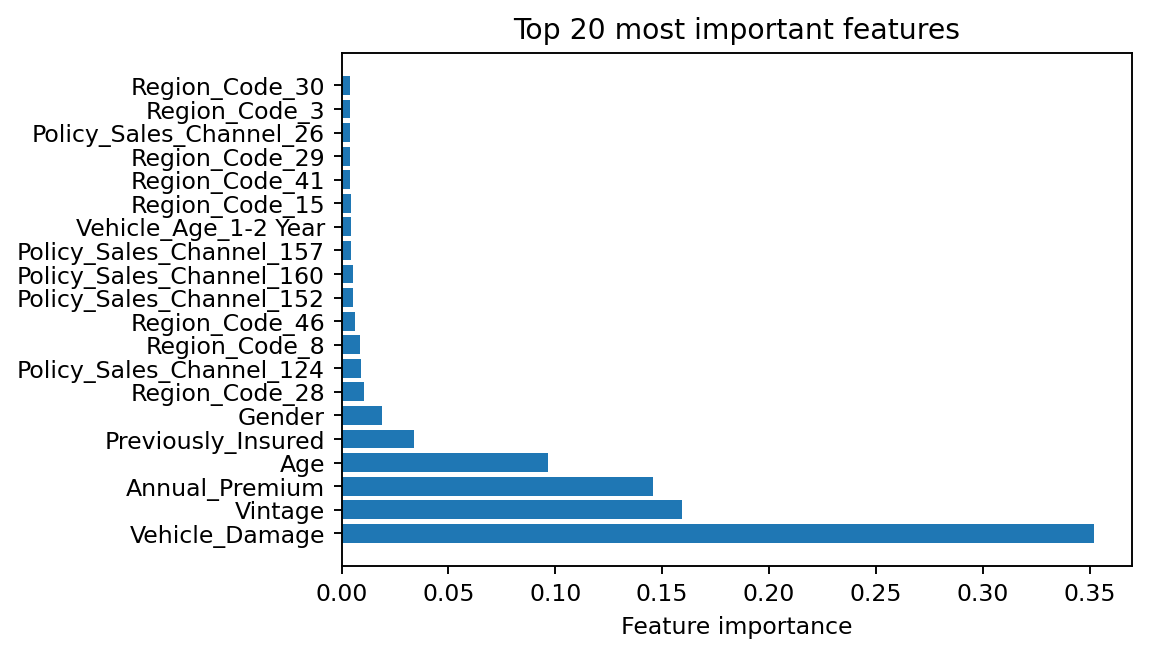

In [152]:
plot_most_important_features(sorted(list(zip(X.columns, tree_small_manually_balanced.feature_importances_)), key=lambda x: x[1], reverse = True),\
    20)